 # Task 1: Naive Bayes Theory Questions
1. What is the core assumption of Naive Bayes?
The core assumption is that all features are conditionally independent of each other given the class label. This simplifies computation and allows efficient probability estimation.

2. Differentiate between GaussianNB, MultinomialNB, and BernoulliNB:

Classifier	Works Best For	Feature Type
GaussianNB	Continuous numeric data	Gaussian (normal) distribution
MultinomialNB	Count data (e.g., word counts)	Discrete frequencies
BernoulliNB	Binary/boolean features (0/1)	Binary occurrence (e.g., word present or not)

3. Why is Naive Bayes suitable for high-dimensional data?
Because it assumes feature independence, Naive Bayes handles high-dimensional spaces efficiently without requiring large training data. It's fast and effective, especially in text classification.



# Task:2

In [1]:
# --- Task 2: Spam Detection using MultinomialNB ---
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])
df['label_num'] = df.label.map({'ham':0, 'spam':1})

# Vectorize text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['message'])
y = df['label_num']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Train model
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9813352476669059
Precision: 0.9251336898395722
Recall: 0.9351351351351351
Confusion Matrix:
 [[1194   14]
 [  12  173]]


# Task 3 : GaussianNB with Iris Dataset 

In [2]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("\nGaussianNB Accuracy:", gnb.score(X_test, y_test))

# Logistic Regression
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
print("Logistic Regression Accuracy:", lr.score(X_test, y_test))

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("Decision Tree Accuracy:", dt.score(X_test, y_test))



GaussianNB Accuracy: 1.0
Logistic Regression Accuracy: 1.0
Decision Tree Accuracy: 1.0


# Task 4: Decision Tree Theory
1. What is entropy and information gain?
Entropy measures impurity in the dataset. Information gain tells how much entropy is reduced after a split. High info gain = better feature to split on.

2. Difference between Gini Index and Entropy:
Both are impurity measures. Gini is faster to compute. Entropy uses logarithmic scale; Gini uses squared probabilities.

3. How can a decision tree overfit?
If the tree grows too deep, it may learn noise from training data. Avoid by pruning, setting max_depth, or min_samples_split.


# Task 5: Decision Tree on Titanic Dataset 



Titanic Decision Tree Accuracy: 0.7471910112359551


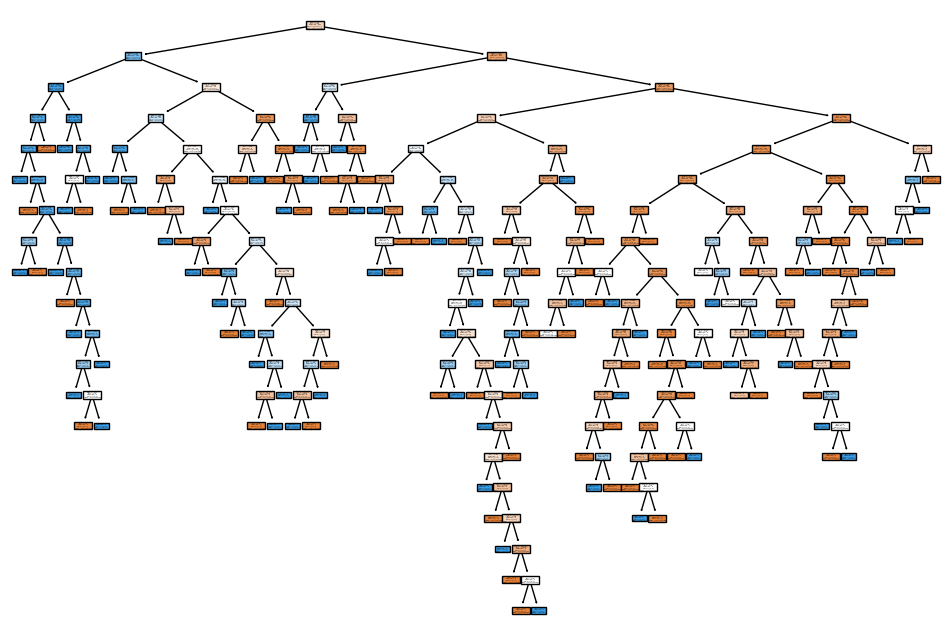

In [3]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

titanic = sns.load_dataset('titanic')
titanic.dropna(subset=['age', 'embarked', 'fare'], inplace=True)

le = LabelEncoder()
titanic['sex'] = le.fit_transform(titanic['sex'])
titanic['embarked'] = le.fit_transform(titanic['embarked'])

features = ['pclass', 'sex', 'age', 'fare', 'embarked']
X = titanic[features]
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("\nTitanic Decision Tree Accuracy:", dt.score(X_test, y_test))

from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=features, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

# Task 6: Model Tuning 

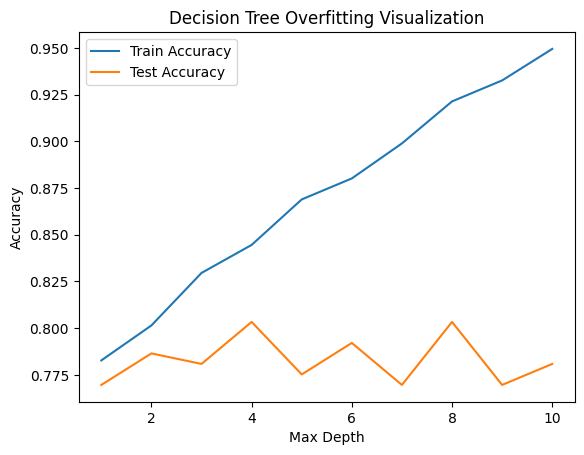

In [4]:
train_accuracies = []
test_accuracies = []

for depth in range(1, 11):
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train, y_train)
    train_accuracies.append(clf.score(X_train, y_train))
    test_accuracies.append(clf.score(X_test, y_test))

plt.plot(range(1, 11), train_accuracies, label='Train Accuracy')
plt.plot(range(1, 11), test_accuracies, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Overfitting Visualization')
plt.legend()
plt.show()

# Task 7: Ensemble Theory
1. Difference between Bagging and Boosting:

Bagging builds independent models and averages them (e.g., Random Forest).

Boosting builds models sequentially to fix previous errors (e.g., AdaBoost).

2. How does Random Forest reduce variance?
By averaging many decision trees trained on random subsets, it reduces overfitting and variance.

3. Weakness of boosting methods:
They are sensitive to noise and can overfit if not tuned properly.


# Task 8: Random Forest vs Decision Tree 



Random Forest Accuracy: 0.8089887640449438
Precision: 0.7702702702702703
Recall: 0.7702702702702703


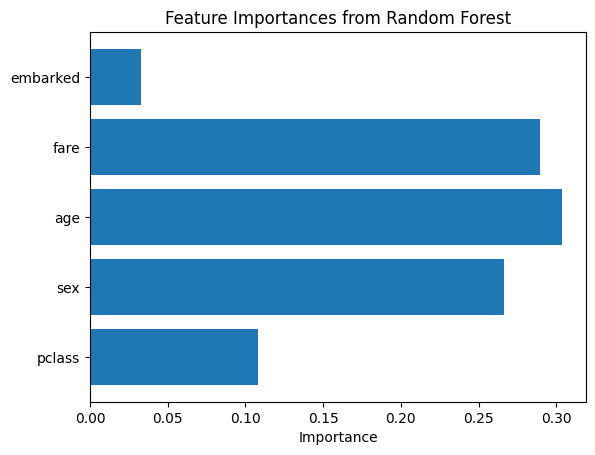

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Accuracy:", rf.score(X_test, y_test))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))

# Feature importance
importances = rf.feature_importances_
plt.barh(features, importances)
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest')
plt.show()


#  Task 9: AdaBoost 

In [6]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier(n_estimators=100, random_state=0)
ab.fit(X_train, y_train)
y_pred_ab = ab.predict(X_test)

print("\nAdaBoost Accuracy:", ab.score(X_test, y_test))
print("F1 Score:", f1_score(y_test, y_pred_ab))


AdaBoost Accuracy: 0.7696629213483146
F1 Score: 0.7210884353741497
